In [1]:
!pip install tensorflow

You should consider upgrading via the 'C:\Users\pp\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

### Task: Build a produce (Corn and Olives) detector.

In [3]:
dataset = pd.DataFrame.from_dict({
    'shape': ['round', 'oval'],
    'color': ['yellow', 'green'],
    'produce': ['corn', 'olives']
})

dataset

,shape,color,produce
0,round,yellow,corn
1,oval,green,olives


In [7]:
# Convert parameters to machine learning understandable form.

dataset['c_shape'] = dataset['shape'].apply(lambda x: 1 if x == 'round' else 0)
dataset['c_color'] = dataset['color'].apply(lambda x: 1 if x == 'yellow' else 0)
dataset['c_produce'] = dataset['produce'].apply(lambda x: 1 if x == 'corn' else 0)

In [8]:
dataset

,shape,color,produce,c_shape,c_color,c_produce
0,round,yellow,corn,1,1,1
1,oval,green,olives,0,0,0


<AxesSubplot:xlabel='c_shape', ylabel='c_color'>

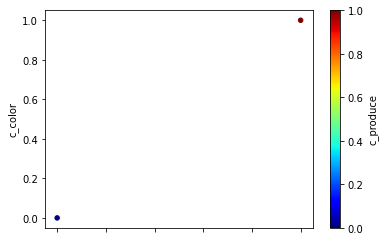

In [12]:
dataset.plot(
    kind='scatter',
    x='c_shape',
    y='c_color',
    c='c_produce',
    colormap='jet'
)

In [13]:
from tensorflow.keras.layers import Dense

In [15]:
# Since we're creating a single neuron layer, the number of units should be 1.

###############################################
# THE NETWORK STRUCTURE
###############################################
single_neuron_layer = Dense(
    units=1,
    input_dim=2,
    activation='sigmoid'
)


###############################################
# THE LOSS FUNCTION
###############################################
loss='binary_crossentropy'


###############################################
# THE OPTIMIZATION ALGORITHM
###############################################
from tensorflow.keras.optimizers import SGD

sgd = SGD()

In [16]:
# Layers in neural nets are connected sequentially

from tensorflow.keras.models import Sequential
single_neuron_model = Sequential()

# Bringing the components into the initialised model above
single_neuron_model.add(single_neuron_layer)
single_neuron_model.compile(loss=loss, optimizer=sgd, metrics=['accuracy'])
single_neuron_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [22]:
# To train the model with our dataset, we call the fit function on our model

history = single_neuron_model.fit(
    dataset[['c_shape', 'c_color']].values,
    dataset[['c_produce']].values,
    epochs=2500
)

Epoch 1/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.4601 - accuracy: 1.0000
Epoch 2/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.4597 - accuracy: 1.0000
Epoch 3/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.4592 - accuracy: 1.0000
Epoch 4/2500
1/1 [==============================] - 0s 6ms/step - loss: 0.4588 - accuracy: 1.0000
Epoch 5/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.4583 - accuracy: 1.0000
Epoch 6/2500
1/1 [==============================] - 0s 12ms/step - loss: 0.4579 - accuracy: 1.0000
Epoch 7/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.4574 - accuracy: 1.0000
Epoch 8/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.4570 - accuracy: 1.0000
Epoch 9/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.4566 - accuracy: 1.0000
Epoch 10/2500
1/1 [==============================] - 0s 6ms/step - loss: 0.4561 - accuracy: 1.0000
Epoch 11/2500
1/1 

In [24]:
# To make predictions using the model, we call the evaluate function on it

test_loss, test_acc = single_neuron_model.evaluate(
    dataset[['c_shape', 'c_color']],
    dataset[['c_produce']]
)

print(f"Evaluation result on Test Data: Loss = {test_loss}, Accuracy = {test_acc}")

1/1 [==============================] - 0s 34ms/step - loss: 0.1142 - accuracy: 1.0000
Evaluation result on Test Data: Loss = 0.11422266066074371, Accuracy = 1.0
